In [ ]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|ice|');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #818286; font-family: 'Roboto';}
span {font-family:'Roboto'; color:black; text-shadow: 5px 5px 5px #aaa;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:lightblue;}      
</style>

📋 Introduction of MoveLens:
This is a report on the movieLens dataset available here. MovieLens itself is a research site run by GroupLens Research group at the University of Minnesota. The first automated recommender system was developed there in 1993.

📝 Dataset Description:
The dataset is available in several snapshots. The ones that were used in this analysis were Latest Datasets - both full and small (for web scraping). They were last updated in October 2016.

📖 Definitions of Pandas:¶
Pandas is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python.

Pandas build upon numpy and scipy providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures pandas provides are Series and DataFrames.

Getting Started
To get started, we will need to; Please note that you will need to download the dataset.

Here are the links to the data source and location:

Data Source: Kaggle Data Science Home (filename: movelens-20m-dataset.zip)
Location: https://www.kaggle.com/grouplens/movielens-20m-dataset

In [2]:
import pandas as pd

Read the Dataset
In this notebook, we will be using three CSV files:

ratings.csv : userId,movieId,rating, timestamp

tags.csv : userId,movieId, tag, timestamp

movies.csv : movieId, title, genres

In [7]:
movies = pd.read_csv(r'C:\Users\M GNANESHWARI\Desktop\movie.csv')
print(type(movies))
movies.head(20)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


▩ DataFrames

In [8]:
tags = pd.read_csv(r'C:\Users\M GNANESHWARI\Desktop\tag.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [9]:
ratings = pd.read_csv(r'C:\Users\M GNANESHWARI\Desktop\rating.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [10]:
del ratings['timestamp']
del tags['timestamp']

In [11]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [12]:
tags

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero
...,...,...,...
465559,138446,55999,dragged
465560,138446,55999,Jason Bateman
465561,138446,55999,quirky
465562,138446,55999,sad


In [13]:
ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


In [28]:
row_0 = tags.iloc[0]
print(type(row_0))
print(row_0)
print(row_0.index)
print(row_0['userId'])
print('rating' in row_0)
print(row_0.name)
row_0 = row_0.rename('firstRow')
row_0.name

<class 'pandas.core.series.Series'>
userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object
Index(['userId', 'movieId', 'tag'], dtype='object')
18
False
0


'firstRow'

📦 Data Structures:
🚦 Series

In [15]:
row_0 = ratings.iloc[0]
type(row_0)

pandas.core.series.Series

In [16]:
row_0 = movies.iloc[0]
type(row_0)

pandas.core.series.Series

In [17]:
print(row_0)


movieId                                              1
title                                 Toy Story (1995)
genres     Adventure|Animation|Children|Comedy|Fantasy
Name: 0, dtype: object


In [29]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [30]:
 tags.index

RangeIndex(start=0, stop=465564, step=1)

In [31]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [32]:
tags.iloc[ [0,11,500] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


📈 📉 Descriptive Statistics
Let's look how the ratings are distributed!

In [33]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [34]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [35]:
ratings['rating'].mean()


3.5255285642993797

In [36]:
ratings.mean()


userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [37]:
ratings['rating'].min()

0.5

In [38]:
ratings['rating'].max()

5.0

In [39]:
ratings['rating'].std()

1.051988919275684

In [40]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [41]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [42]:
filter1 = ratings['rating'] > 10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [43]:
filter2 = ratings['rating'] > 0
filter2.all()

True

🔧 Data Cleaning: Handling Missing Data

In [44]:
movies.shape

(27278, 3)

In [45]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [46]:
movies.isnull().any().any()

False

In [47]:
ratings.shape

(20000263, 3)

In [48]:
ratings.isnull().any().any()

False

In [49]:
tags.shape

(465564, 3)

In [50]:
tags.isnull().any().any()

True

In [51]:
tags=tags.dropna()


In [52]:
tags.isnull().any().any()

False

In [53]:
tags.shape


(465548, 3)

📊 Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB008D57B8>]],
      dtype=object)

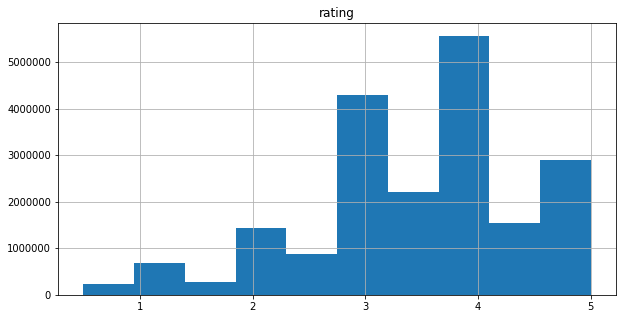

In [54]:
%matplotlib inline

ratings.hist(column='rating', figsize=(10,5))

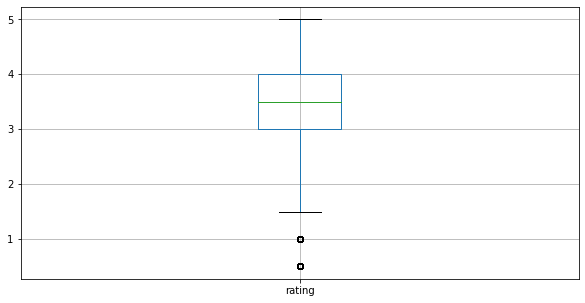

In [55]:
ratings.boxplot(column='rating', figsize=(10,5))

📤 Slicing Out Columns

In [56]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [57]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [58]:
ratings[-10:]


,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [59]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

oddball                                   1
cult of masulinity                        1
Ewe Mean Sausage McHoody With Eggs        1
matrilinial                               1
Interplay between Freeman and Hackman.    1
Charlotte Coleman                         1
ambivalence                               1
overambitious                             1
looking for himself                       1
space cowboys                             1
Name: tag, dtype: int64

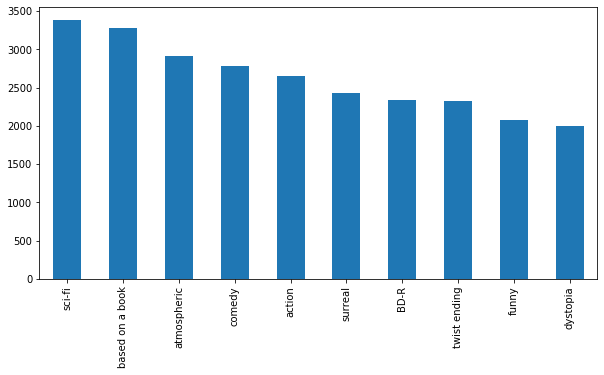

In [60]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))

🎣 Filters for Selecting Rows

In [61]:
is_highly_rated = ratings['rating'] >= 5.0
ratings[is_highly_rated][30:50]

,userId,movieId,rating
239,3,50,5.0
242,3,175,5.0
244,3,223,5.0
245,3,260,5.0
246,3,316,5.0
247,3,318,5.0
248,3,329,5.0
252,3,457,5.0
253,3,480,5.0
254,3,490,5.0


In [62]:
is_action= movies['genres'].str.contains('Action')
movies[is_action][5:15]

,movieId,title,genres
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
70,71,Fair Game (1995),Action
75,76,Screamers (1995),Action|Sci-Fi|Thriller
77,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
85,86,White Squall (1996),Action|Adventure|Drama


In [63]:
movies[is_action].head(15)

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


In [64]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count


,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [65]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [66]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [67]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


In [68]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [69]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [70]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


In [71]:
avg_ratings= ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [72]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [73]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]


,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [74]:
is_Adventure = box_office['genres'].str.contains('Adventure')
box_office[is_Adventure][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
7,8,Tom and Huck (1995),Adventure|Children,3.142049
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
12,13,Balto (1995),Adventure|Animation|Children,3.272416


In [75]:
box_office[is_Adventure & is_highly_rated][-5:]

,movieId,title,genres,rating
26611,130586,Itinerary of a Spoiled Child (1988),Adventure|Drama,4.5
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [76]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [77]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [78]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [79]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [80]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


In [81]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)


In [82]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


In [83]:
tags = pd.read_csv(r'C:\Users\M GNANESHWARI\Desktop\tag.csv')

In [84]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

In [85]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [86]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

ValueError: non convertible value 2009-04-24 18:19:40 with the unit 's'

In [87]:
tags['parsed_time'].dtype

KeyError: 'parsed_time'

In [88]:
tags.head(2)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18


In [89]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

KeyError: 'parsed_time'

In [90]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

KeyError: 'parsed_time'

📇 Average Movie Ratings over Time
Movie ratings related to the year of launch?

In [91]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [92]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()


,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000
